# Gaurav Raut
2038584

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

Importing all required lbraries for image classification

In [ ]:
classifier= Sequential()

sequential provides training and inference features for our mode; model.

In [ ]:
classifier.add(Convolution2D(filters=32, # output feature maps
                             kernel_size=(3,3), # matrix size for feature detector
                             input_shape=(200, 200, 3), # input image shape, 3 is for rgb coloured image with 128*128 px
                             kernel_initializer='he_uniform', # weights distriution
                             activation='relu'))

adding a convolutional layer with 32 filter size 3*3 kernal 
size with relu activation function, he_uniform initializer and resizing image to 200*200

In [ ]:
classifier.add(MaxPooling2D(pool_size=(2,2))) 

Adding maxpooling layer of pool size 2*2

In [ ]:
classifier.add(Convolution2D(filters=32,
                             kernel_size=(3,3), 
                             kernel_initializer='he_uniform', 
                             activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
adding another convolutional layer

In [ ]:
classifier.add(Flatten())

The Flatten layer will take the output from the previous max-pooling layer and convert it to a 1D array such that it can be feed into the Dense layers.

In [ ]:

#Step 4 full connection in which input we have from flattening

classifier.add(Dense(units=128,kernel_initializer='glorot_uniform', activation='relu')) 
#step 5 output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

 A dense layer is a regular layer of neurons in a neural network. This is where the actual learning process happens by adjusting the weights. Here we have 2 such dense layers and since this is a binary classification there is only 1 neuron in the output layer. The number of neurons in the other layer can be adjusted as a hyperparameter to obtain the best accuracy.

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_data= ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32

In [ ]:
training_set= train_data.flow_from_directory(directory= 'dataset/train',
                                               target_size=(200,200), # As we choose 64*64 for our convolution model
                                               batch_size=batch_size,
                                               class_mode='binary' # for 2 class binary 
                                               )

Found 400 images belonging to 2 classes.


In [ ]:
test_set= test_data.flow_from_directory(directory= 'dataset/test',
                                               target_size=(200,200), # As we choose 64*64 for our convolution model
                                               batch_size=batch_size,
                                               class_mode='binary' # for 2 class binary
                                          )

Found 100 images belonging to 2 classes.


Here we have 2 data generators for train and test data. When loading the data a rescaling is applied to normalize the pixel values for faster converging the model. Moreover, when loading the data we do it in 20 image batches and all of them are resized into 200*200 size. If there are images in different sizes this will fix it.

In [ ]:
model=classifier.fit(training_set, #training data to fit
                         steps_per_epoch=400 // batch_size, # Data in training set
                         epochs=10, # No of epochs to run
                        validation_data=test_set, # Test or validation set
                        validation_steps=100 // batch_size # no of data point for validation
                        )

Epoch 1/10
12/12 [==============================] - 9s 683ms/step - loss: 5.1936 - accuracy: 0.5419 - val_loss: 0.8151 - val_accuracy: 0.6667
Epoch 2/10
12/12 [==============================] - 7s 547ms/step - loss: 0.6654 - accuracy: 0.6903 - val_loss: 0.3587 - val_accuracy: 0.8646
Epoch 3/10
12/12 [==============================] - 7s 552ms/step - loss: 0.4369 - accuracy: 0.7996 - val_loss: 0.2634 - val_accuracy: 0.8854
Epoch 4/10
12/12 [==============================] - 7s 558ms/step - loss: 0.3487 - accuracy: 0.8344 - val_loss: 0.3460 - val_accuracy: 0.8542
Epoch 5/10
12/12 [==============================] - 7s 542ms/step - loss: 0.3245 - accuracy: 0.8586 - val_loss: 0.2774 - val_accuracy: 0.8854
Epoch 6/10
12/12 [==============================] - 7s 556ms/step - loss: 0.2757 - accuracy: 0.8877 - val_loss: 0.2419 - val_accuracy: 0.9167
Epoch 7/10
12/12 [==============================] - 7s 599ms/step - loss: 0.2338 - accuracy: 0.9017 - val_loss: 0.2585 - val_accuracy: 0.9062
Epoch 

Here we are passing the train and validation generators we used to load our data. Since our data generator has 32 batch size we need to have 100 stps_per_epoch to cover all 400 training images and 200 for validation images. The epochs parameter sets the number of iterations we conduct for training. The verbose parameter will show the progress in each iteration while training.

In [ ]:
 classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               9437312   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

shows layers , trainable and non trainable parameters of our model.

In [ ]:
losses = pd.DataFrame(classifier.history.history)

<Figure size 1440x576 with 0 Axes>

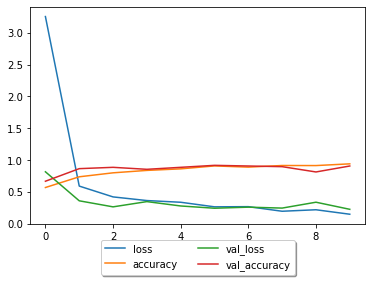

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
losses.plot()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)

visualizing loss, val_loss, accuracy, val_accuracy through line graph

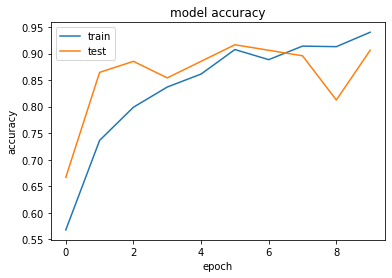

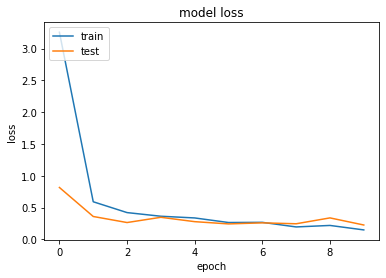

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

visualizing accuracy and loss for training and testing data

In [ ]:
target_names=[]

for key in training_set.class_indices:
    target_names.append(key)
    
print(target_names)

['cars', 'planes']


In [ ]:
import numpy as np
Y_pred = classifier.predict_generator(test_set, 100// batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[50  0]
 [50  0]]
Classification Report
              precision    recall  f1-score   support

        cars       0.50      1.00      0.67        50
      planes       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



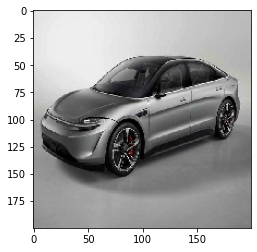

[[0.]]
This is car


In [ ]:
import numpy as np
import os
from keras.preprocessing import image

import matplotlib.pyplot as plt

test_image = image.load_img("car.jpg", target_size = (200,200))
plt.imshow(test_image)
plt.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
   

    #  Loading the image and converting the pixels into array whcih will be used as input to predict.

# test_image = np.vstack(test_image)
result = classifier.predict(test_image,batch_size=10)
print(result)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'This is plane'
else:
    prediction = 'This is car'
print(prediction)




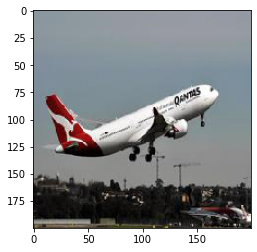

[[1.]]
This is plane


In [ ]:
test_image = image.load_img("2.jpg", target_size = (200,200))
plt.imshow(test_image)
plt.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
   

    #  Loading the image and converting the pixels into array whcih will be used as input to predict.

# test_image = np.vstack(test_image)
result = classifier.predict(test_image,batch_size=10)
print(result)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'This is plane'
else:
    prediction = 'This is car'
print(prediction)